In [15]:
from __future__ import division

import gym
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import tensorflow.contrib.slim as slim

import trackpy as tp
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import scipy.misc
import os
%matplotlib inline
from trackpy.predict import NearestVelocityPredict

import cv2

In [16]:
import pdb
from time import sleep

import tensorflow.python.platform
from tensorflow.python.platform import gfile

from PIL import Image
import re

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier

import cPickle

In [17]:
from piaget import Point, Mover, MoverTracker, FramePair, Box, Prototyper
from piaget import init_env, play

In [18]:
random_seed = 79

In [19]:
np.random.seed(random_seed)
#env = gym.make('MsPacmanNoFrameskip-v4'); num_wait_steps=100;
env = gym.make('BreakoutNoFrameskip-v3'); num_wait_steps = 1;
#env = gym.make('AssaultNoFrameskip-v3'); num_wait_steps = 1;

[2017-07-12 22:31:44,033] Making new env: BreakoutNoFrameskip-v3
/Users/robertfriel/Documents/neural_networks/gym/gym/envs/registration.py:17: DeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [20]:
import matplotlib.colors as mcolors
box_colors_rgb = np.array([mcolors.hex2color(v) for v in mcolors.cnames.values()]).reshape((1,147, 3))
box_colors_hsv = mcolors.rgb_to_hsv(box_colors_rgb)
good_indices = (box_colors_hsv[0][:,1] > 0.5) & (box_colors_hsv[0][:,2] < 0.8)

box_colors = box_colors_rgb[0][good_indices]

In [21]:
num_steps = 30
img_dir = 'img/'
mt_dir = 'mt/'
mt = play(num_steps, env, img_dir, mt_dir, num_wait_steps, 3018)
fp = mt.frame_pairs
frame_thresh = [f.thresh for f in fp]

print mt.game_id

piaget.py:513: RuntimeWarning: Degrees of freedom <= 0 for slice
  var_crop = ((f1_crop + gt_crop).flatten()**2).var()


718117



 Frame: 0


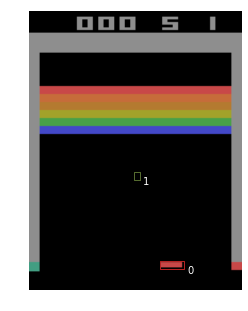


 Frame: 1


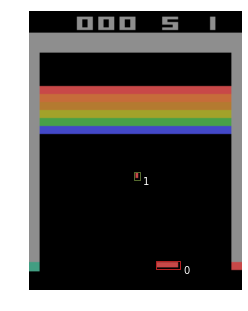


 Frame: 2


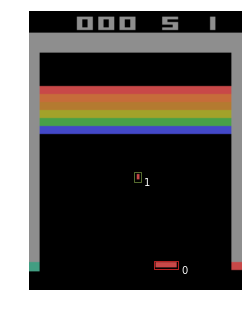


 Frame: 3


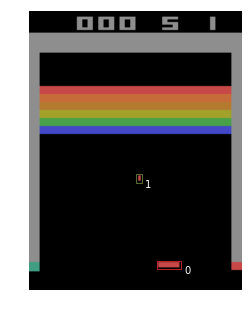


 Frame: 4


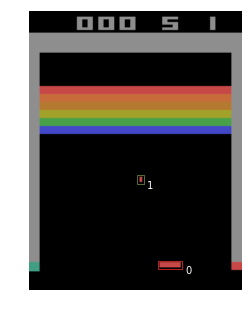


 Frame: 5


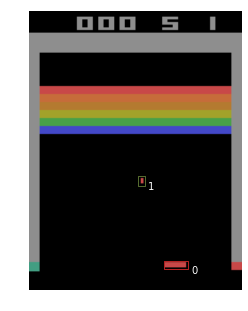


 Frame: 6


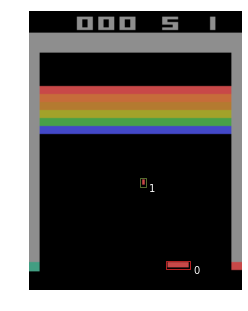


 Frame: 7


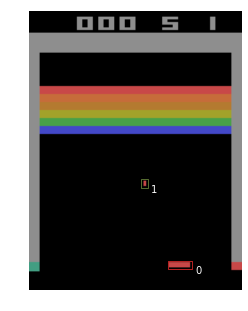


 Frame: 8


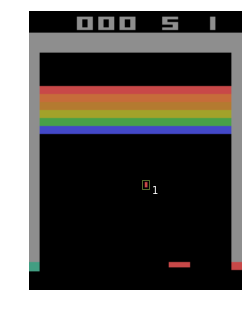


 Frame: 9


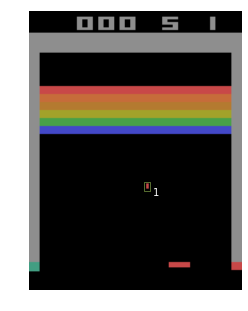


 Frame: 10


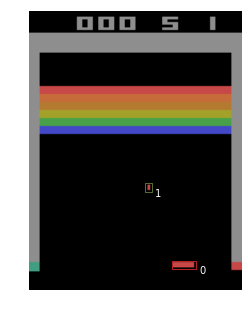


 Frame: 11


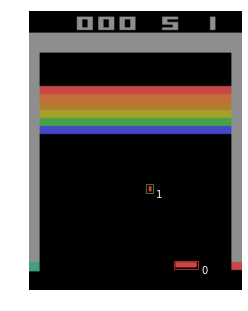


 Frame: 12


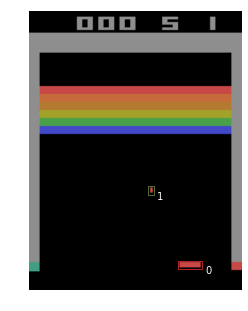


 Frame: 13


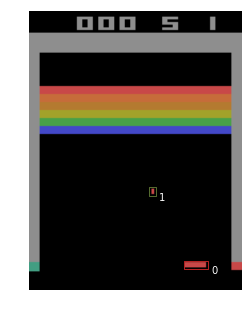


 Frame: 14


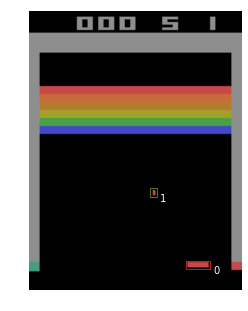


 Frame: 15


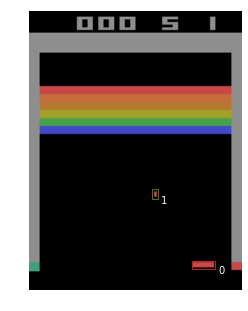


 Frame: 16


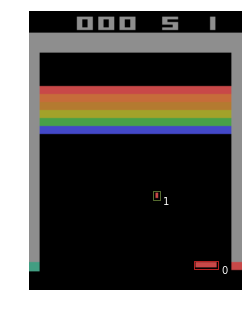


 Frame: 17


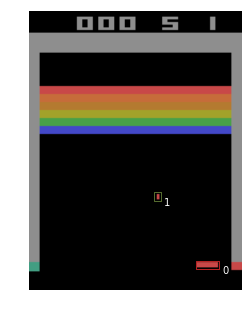


 Frame: 18


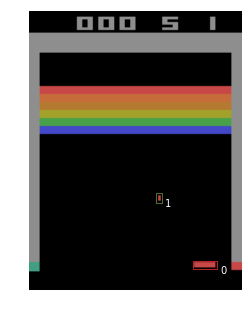


 Frame: 19


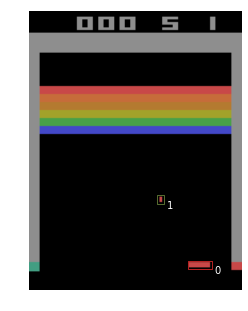


 Frame: 20


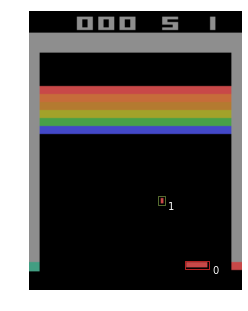


 Frame: 21


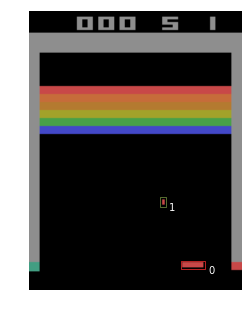


 Frame: 22


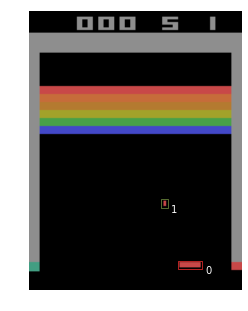


 Frame: 23


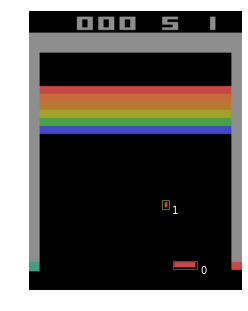


 Frame: 24


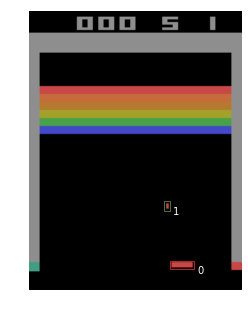


 Frame: 25


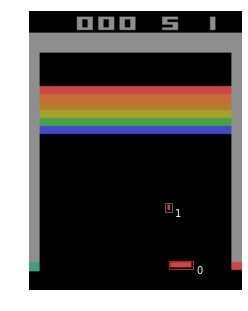


 Frame: 26


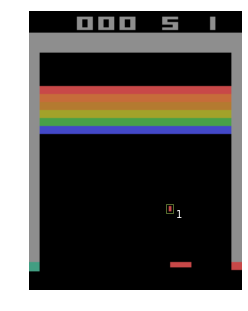


 Frame: 27


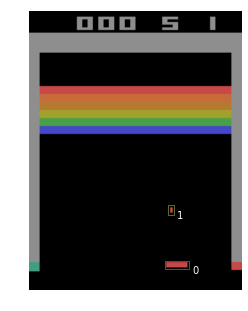


 Frame: 28


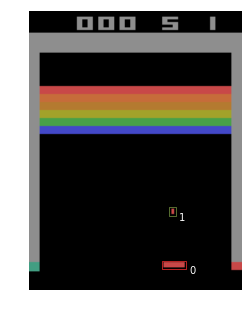


 Frame: 29


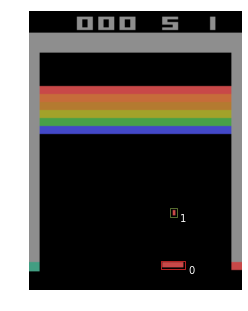


 Frame: 30


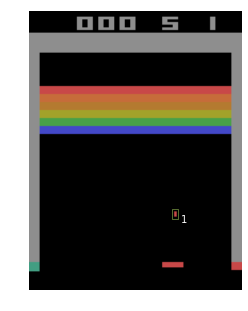

In [33]:
for i in range(mt.cur_frame):
    print '\n Frame: ' + str(i)
    #print 'Action: ' + str(mt.action_hist[i]) + '\n'
    fig = plt.figure(figsize=(12,5))

    movers_cur_frame = []
    for m in mt.movers:
        cur_frame_pos = filter(lambda p: p[0]==i, m.trajectory)
        if len(cur_frame_pos) > 0:
            movers_cur_frame.append((m.id, cur_frame_pos[0][1]))
        
    ax = plt.gca()
    plt.axis('off')
    if i == 0:
        plt.imshow(fp[i].s0)
    else:
        plt.imshow(fp[i-1].s1)
    for data in movers_cur_frame:
        m_id = data[0]
        box = data[1]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[(m_id+1) % len(box_colors)],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    plt.show()

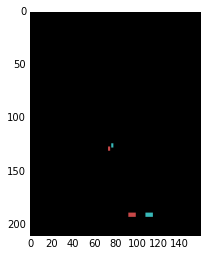

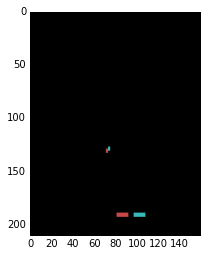

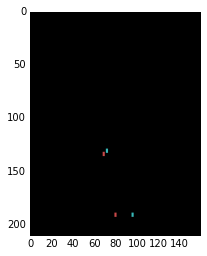

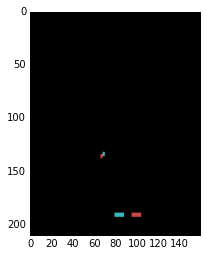

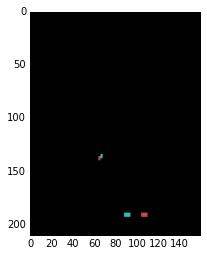

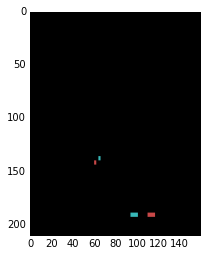

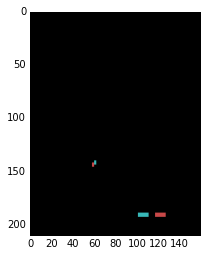

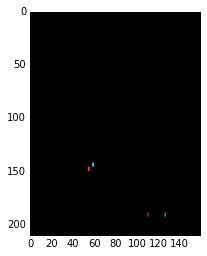

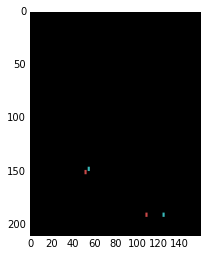

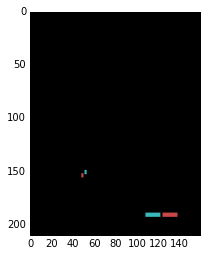

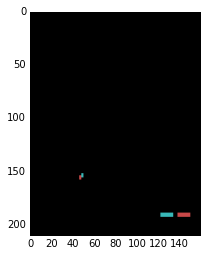

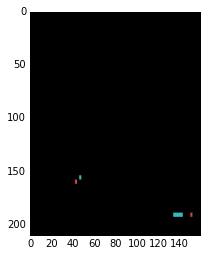

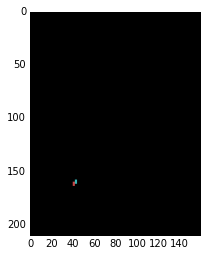

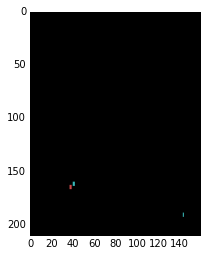

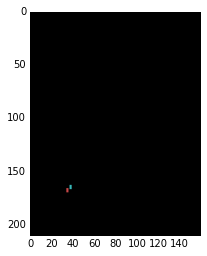

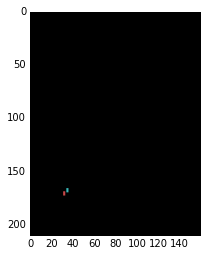

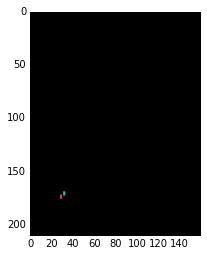

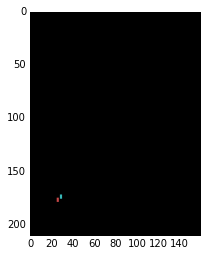

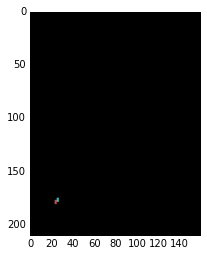

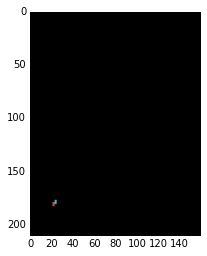

In [32]:
for f in fp:
    plt.imshow(f.s1-f.s0)
    plt.show()

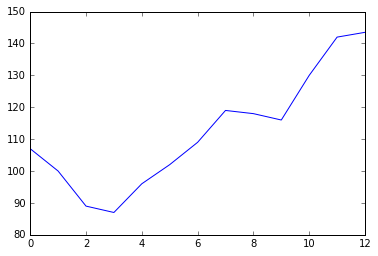

In [28]:
plt.plot([t[1].center.x for t in traj])

In [24]:
traj = mt.movers[0].trajectory
disp_boxes = [(t1[1]-t0[1]) for t1, t0 in zip(traj[1:],traj[:-1])]
disp_pts = [b.ll for b in disp_boxes]
disp_unique = {d.to_tuple() for d in disp_pts}
disp_unique

{(-11, 0),
 (-7, 0),
 (-2, 0),
 (-1, 0),
 (6, 0),
 (7, 0),
 (9, 0),
 (10, 0),
 (12, 0),
 (14, 0)}

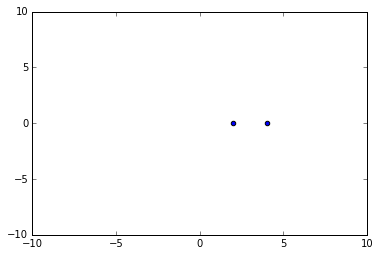

In [20]:
plt.scatter(*zip(*disp_unique))
plt.axis([-10,10,-10,10]);


 Frame: 0


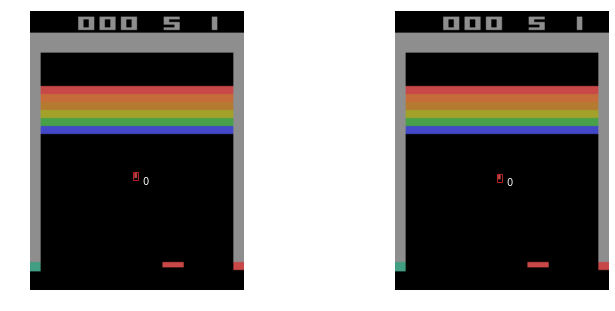


 Frame: 1


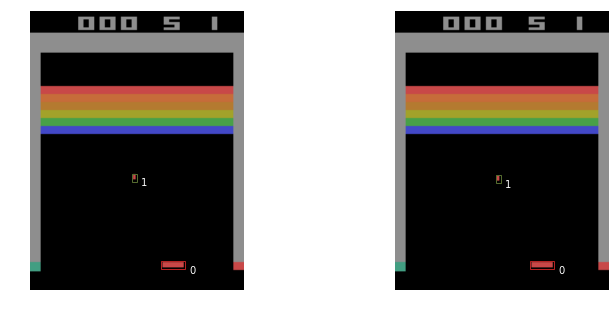


 Frame: 2


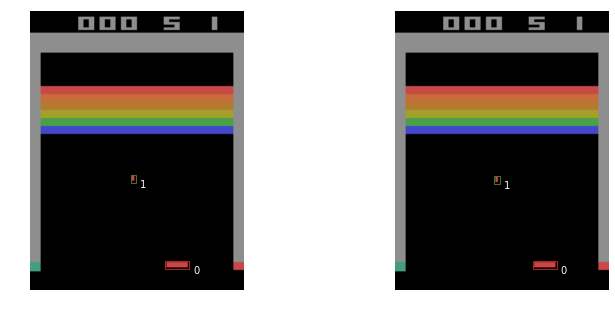


 Frame: 3


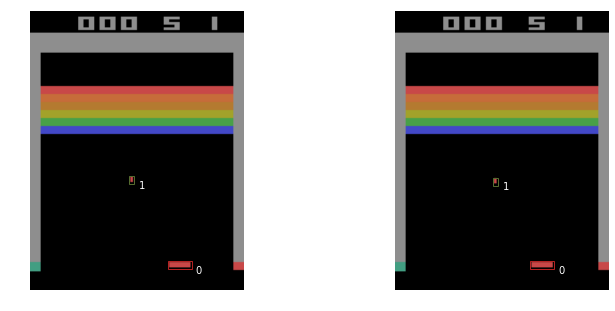


 Frame: 4


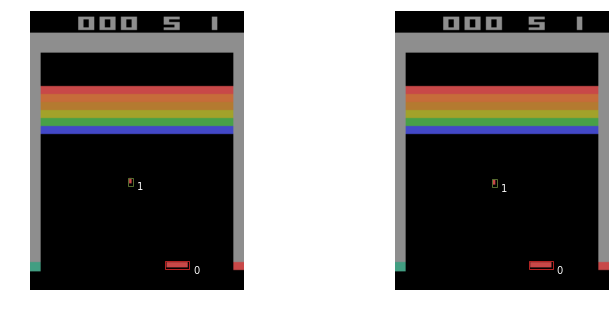


 Frame: 5


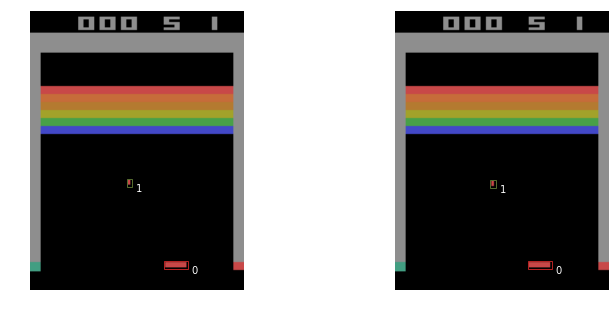


 Frame: 6


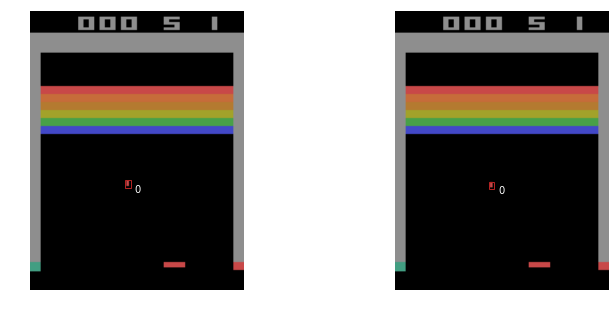


 Frame: 7


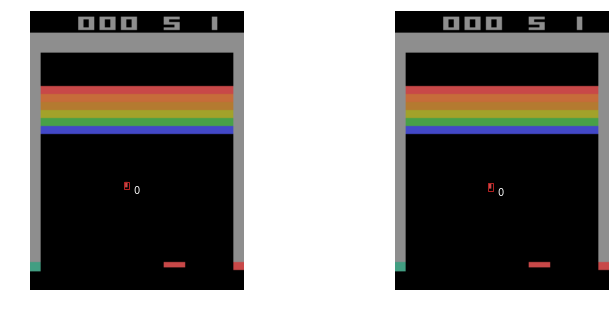


 Frame: 8


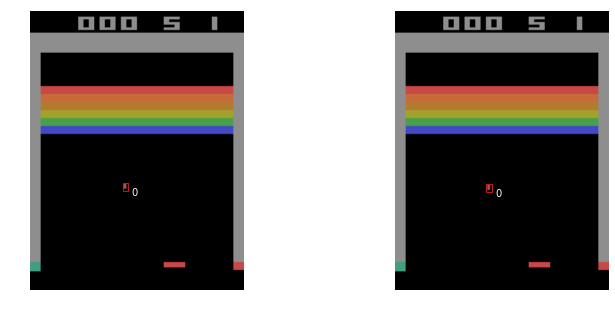


 Frame: 9


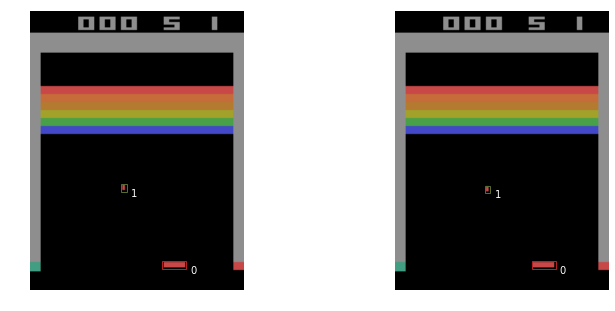


 Frame: 10


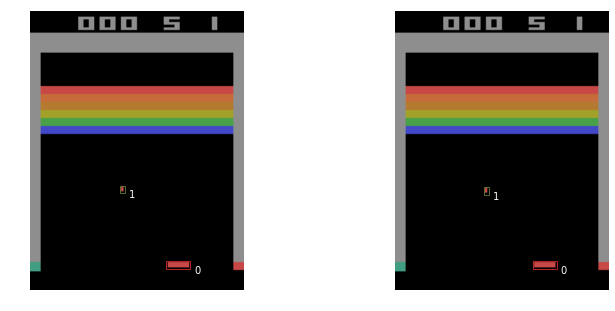


 Frame: 11


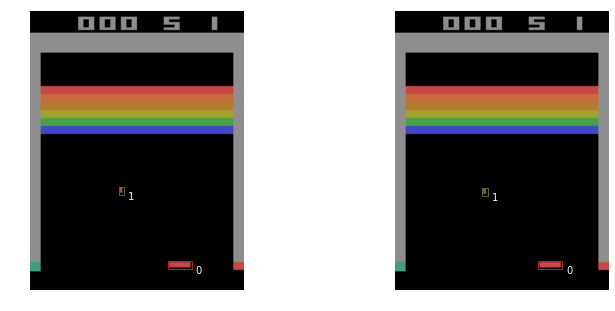


 Frame: 12


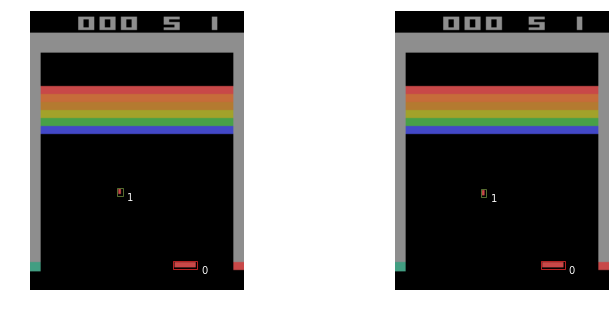


 Frame: 13


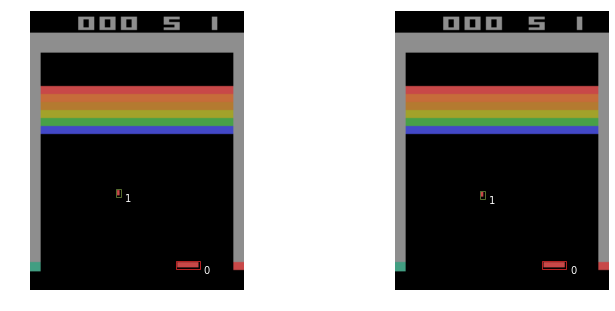


 Frame: 14


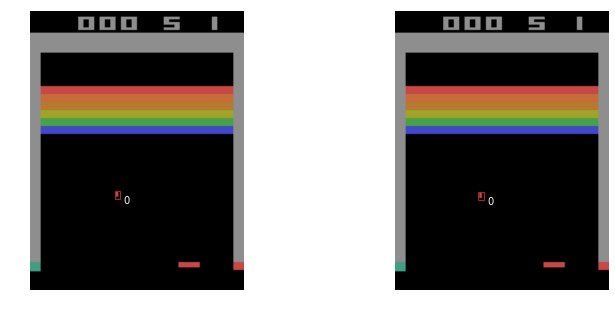


 Frame: 15


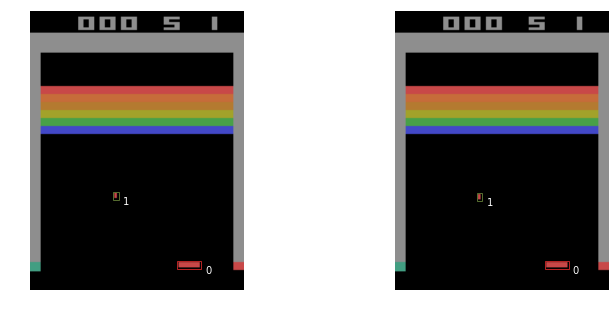


 Frame: 16


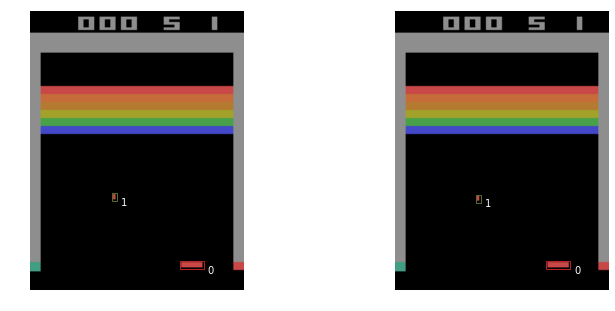


 Frame: 17


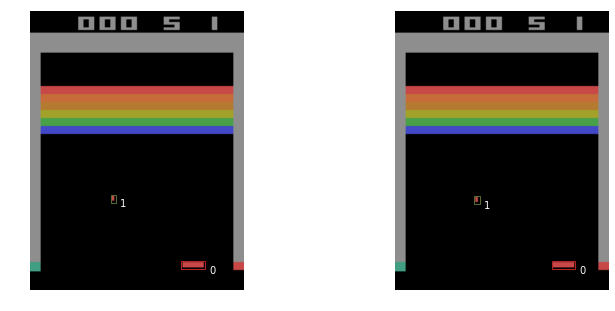


 Frame: 18


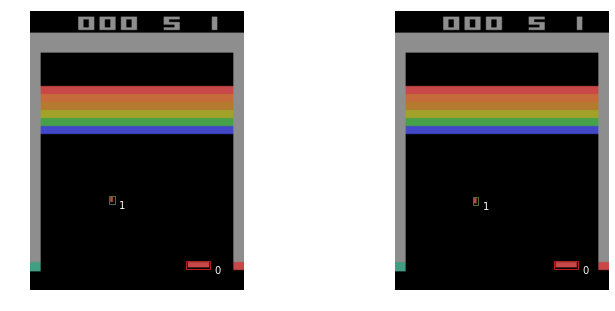


 Frame: 19


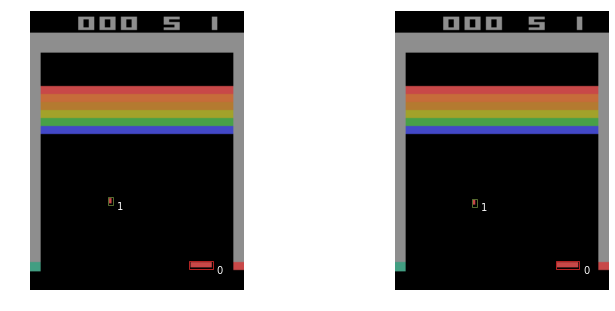


 Frame: 20


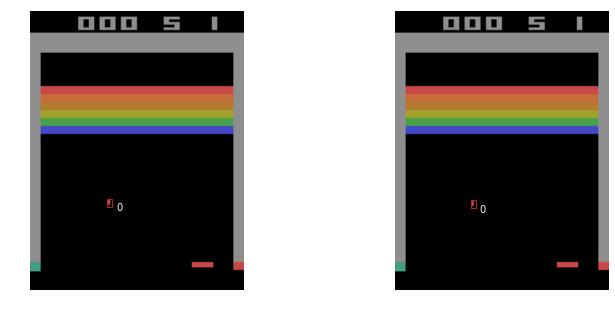


 Frame: 21


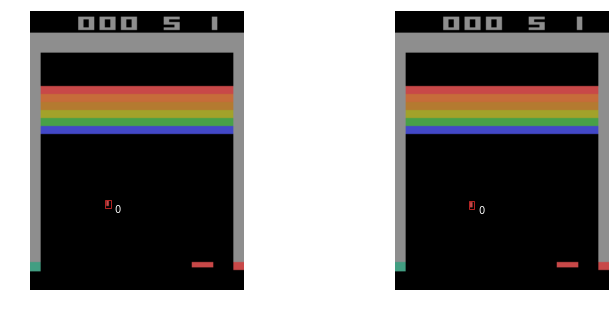


 Frame: 22


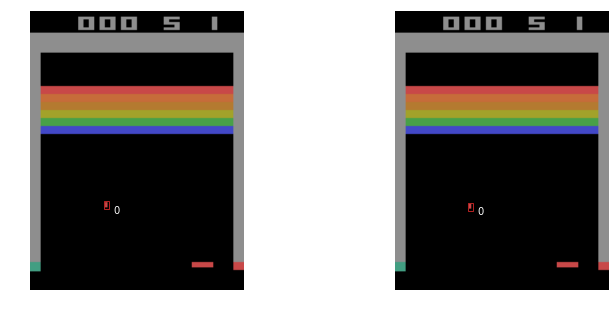


 Frame: 23


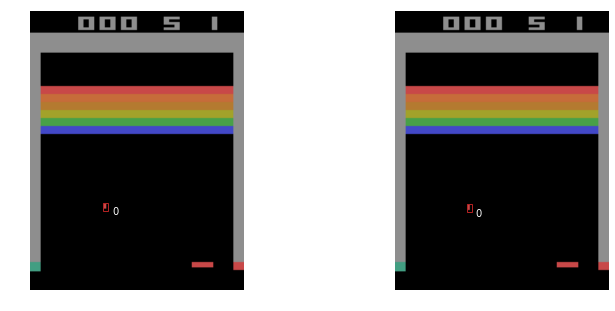


 Frame: 24


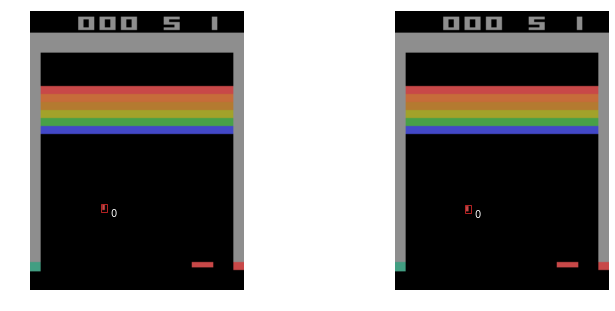


 Frame: 25


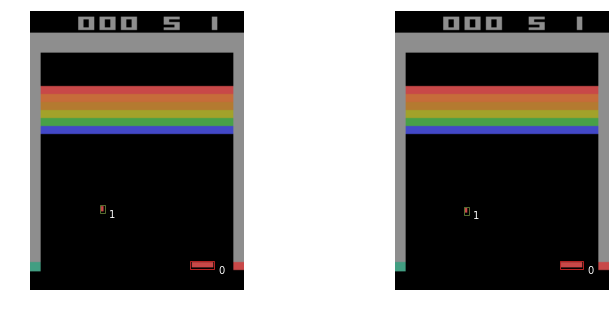


 Frame: 26


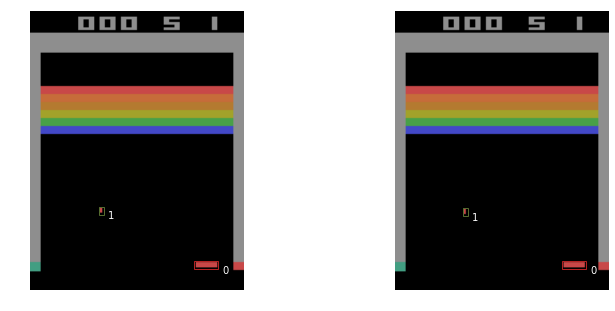


 Frame: 27


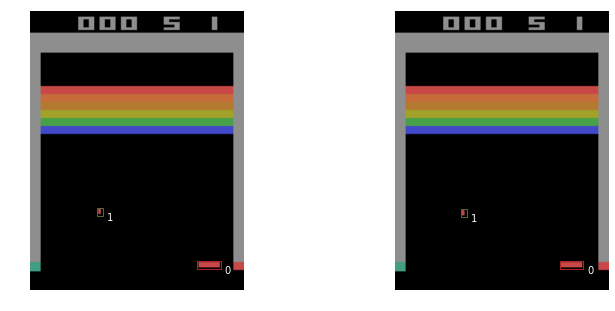


 Frame: 28


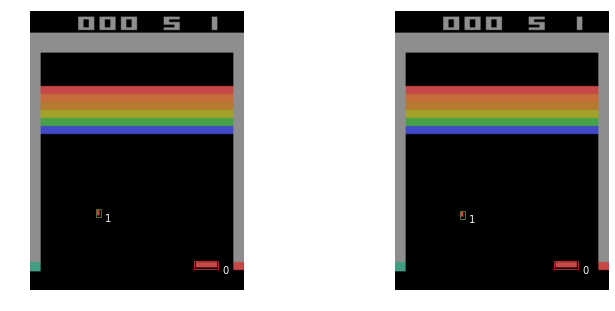


 Frame: 29


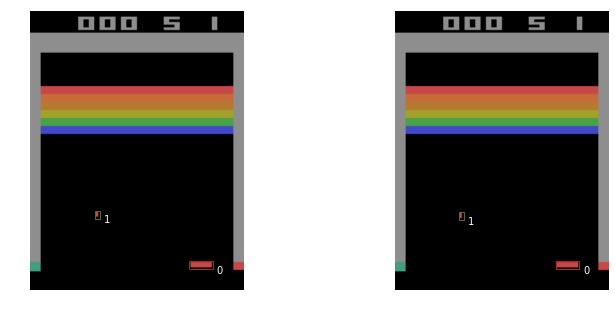


 Frame: 30


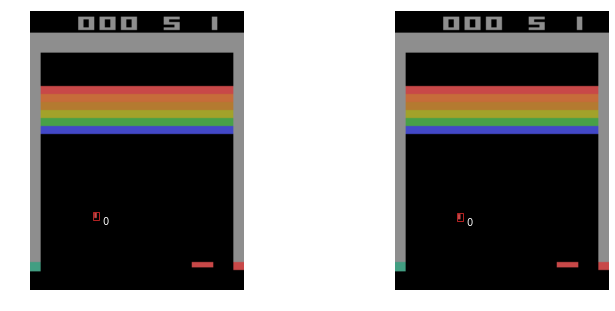


 Frame: 31


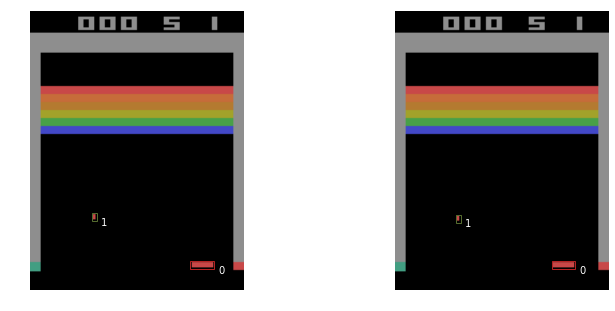


 Frame: 32


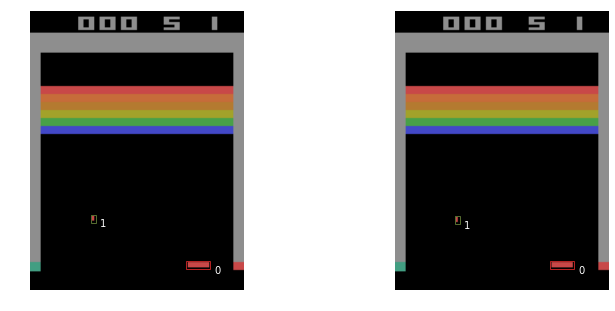


 Frame: 33


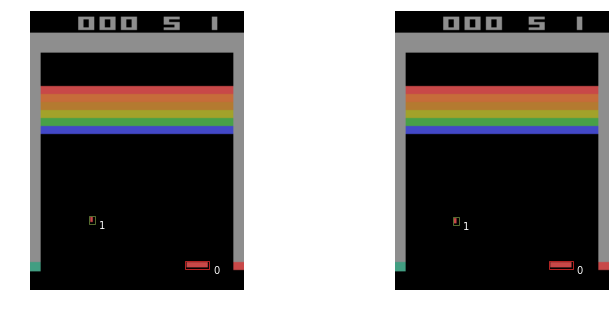


 Frame: 34


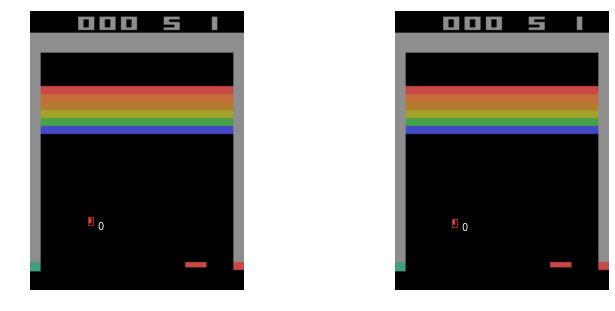


 Frame: 35


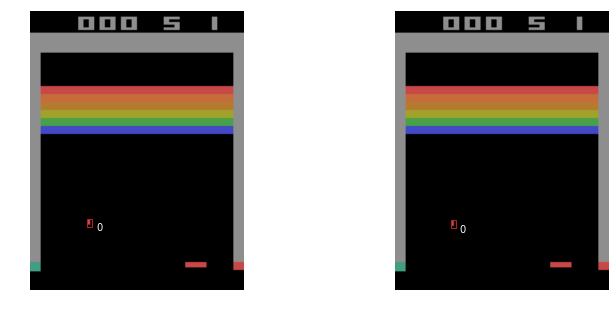


 Frame: 36


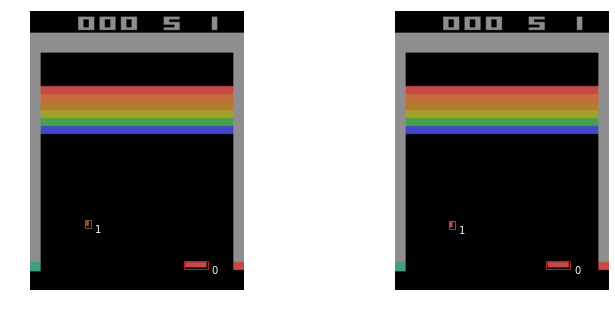


 Frame: 37


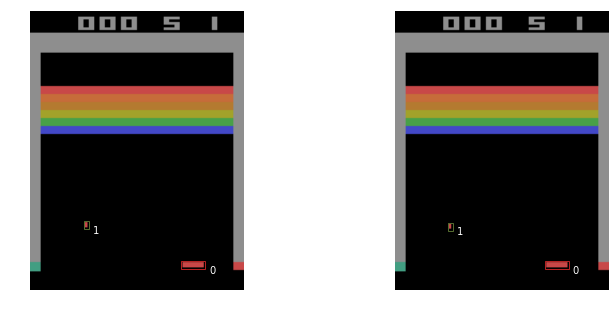


 Frame: 38


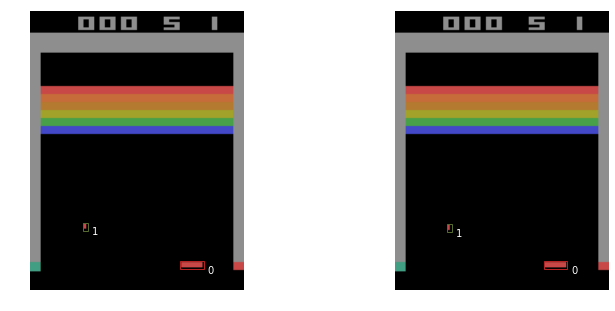


 Frame: 39


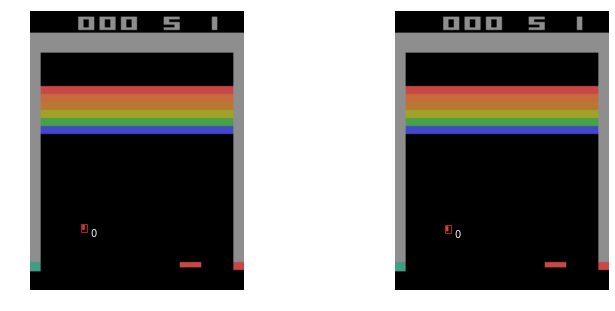


 Frame: 40


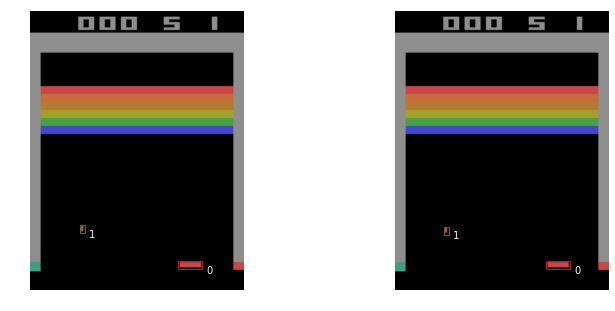


 Frame: 41


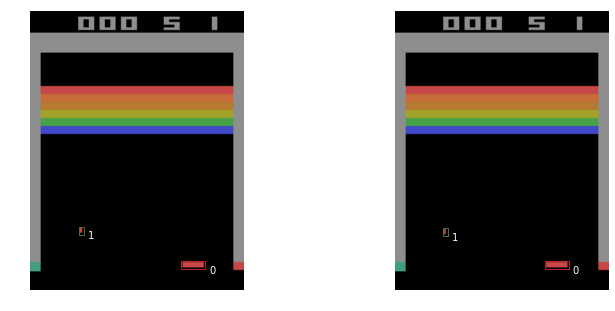


 Frame: 42


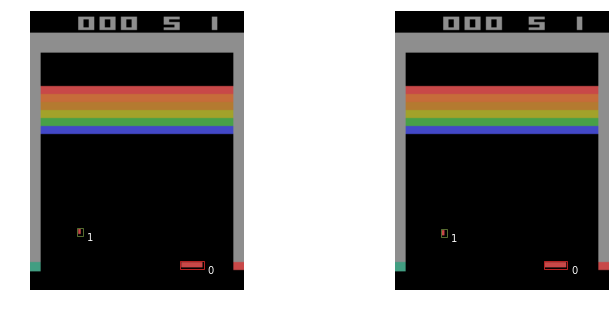


 Frame: 43


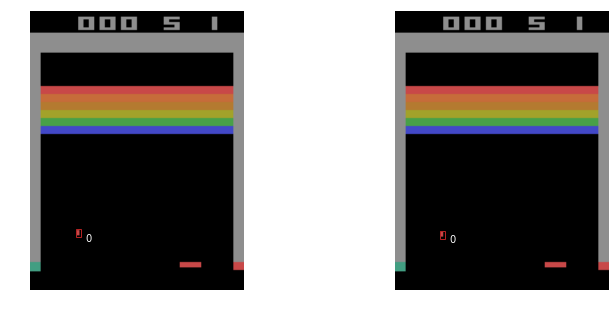


 Frame: 44


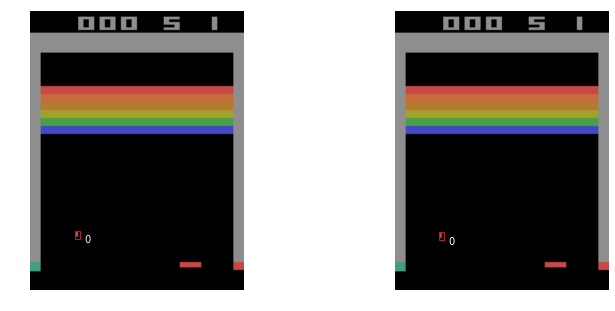


 Frame: 45


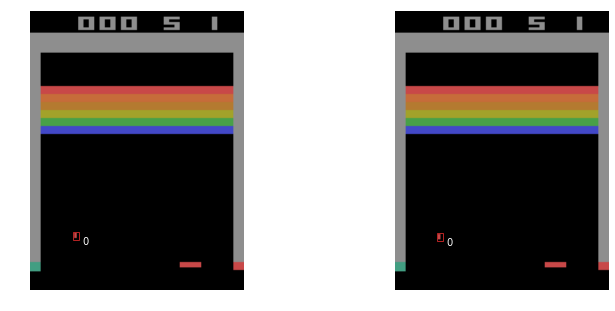


 Frame: 46


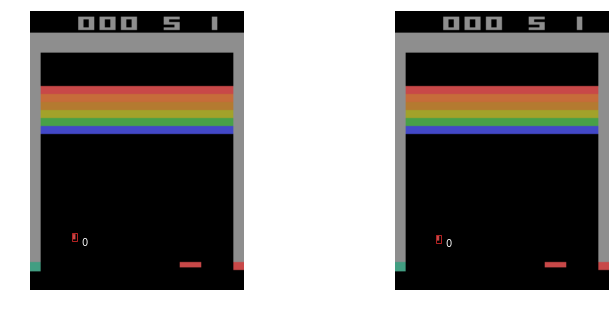


 Frame: 47


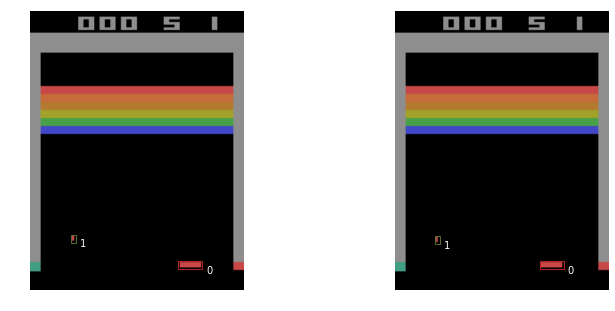


 Frame: 48


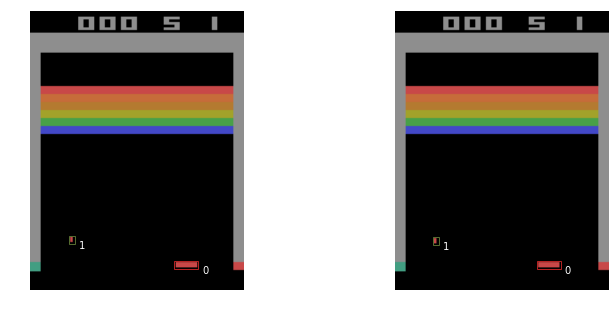


 Frame: 49


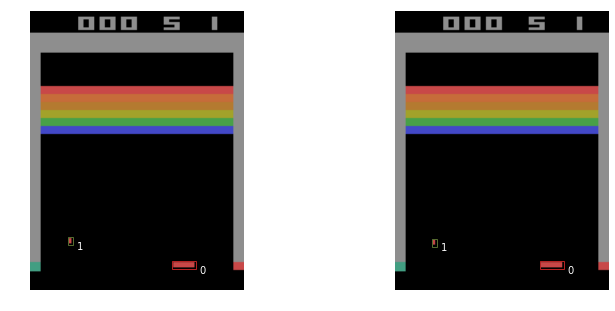


 Frame: 50


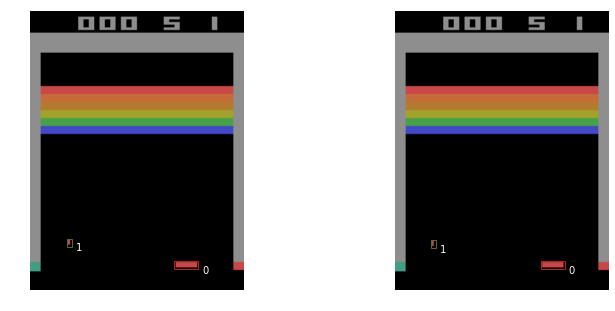


 Frame: 51


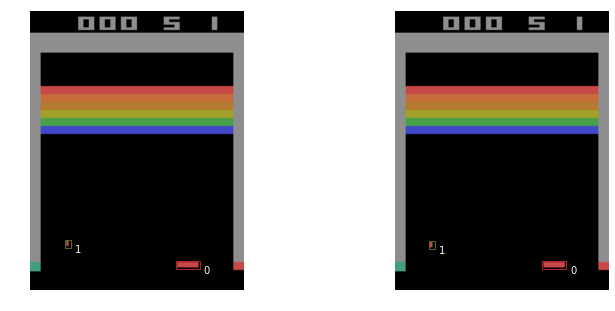


 Frame: 52


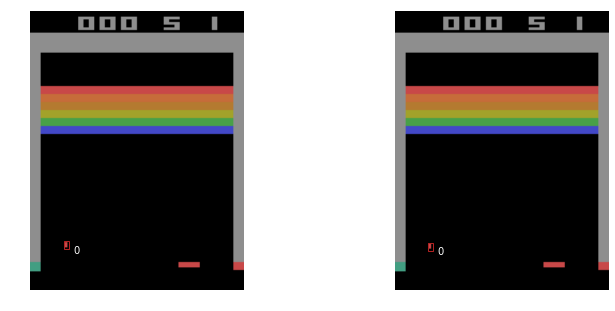


 Frame: 53


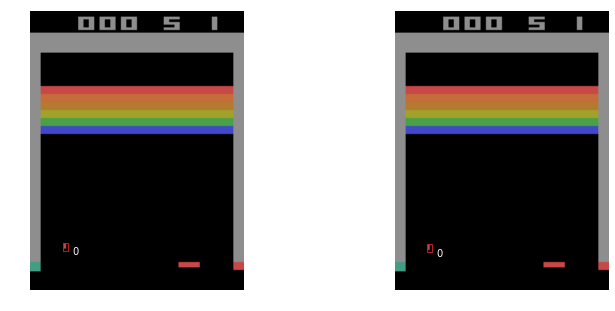


 Frame: 54


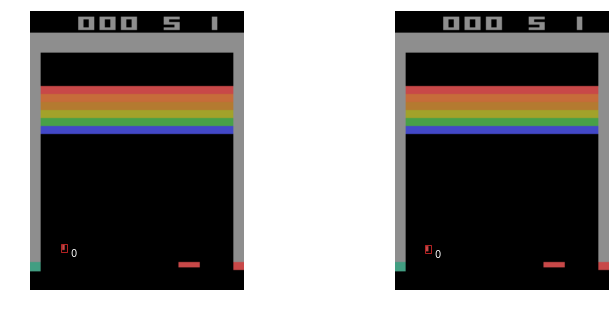


 Frame: 55


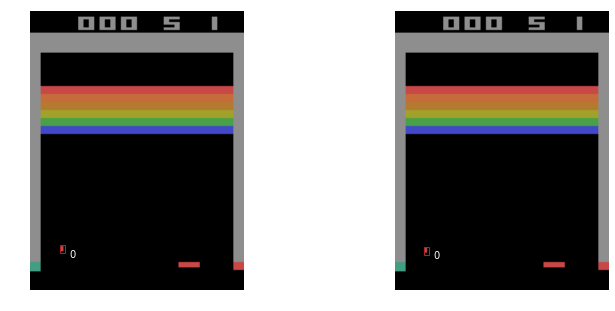


 Frame: 56


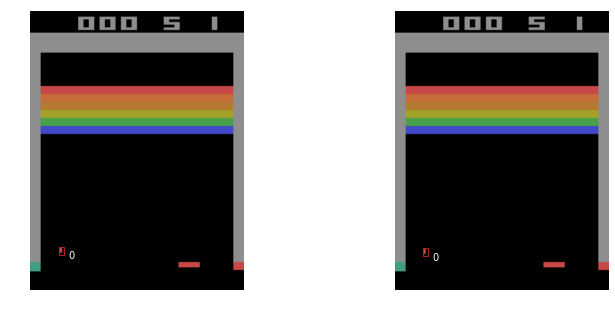


 Frame: 57


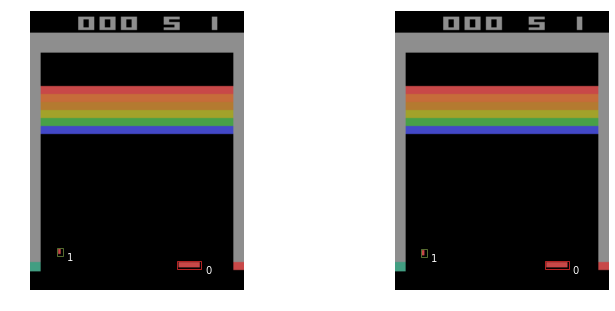


 Frame: 58


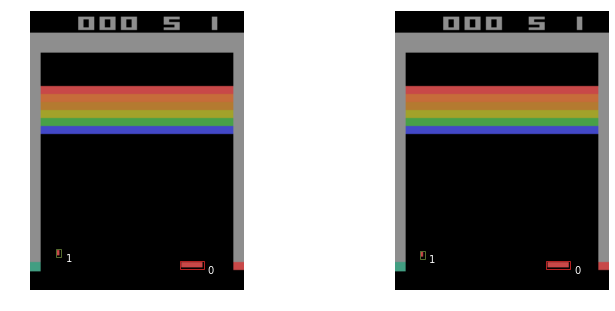


 Frame: 59


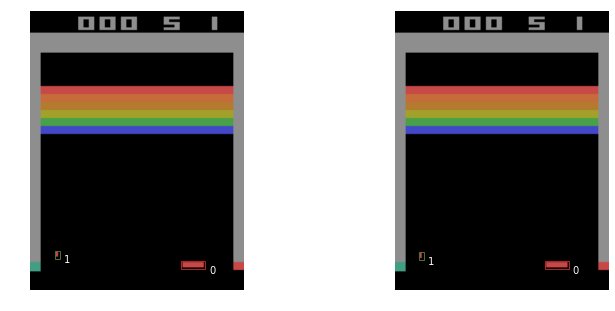


 Frame: 60


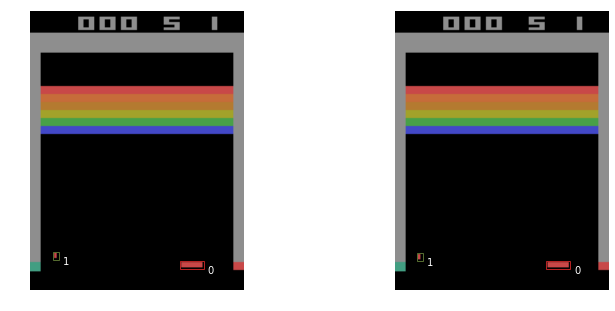


 Frame: 61


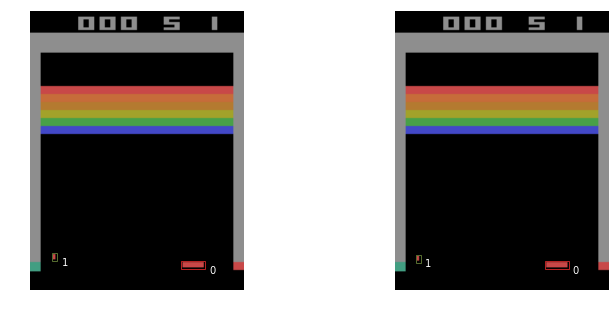


 Frame: 62


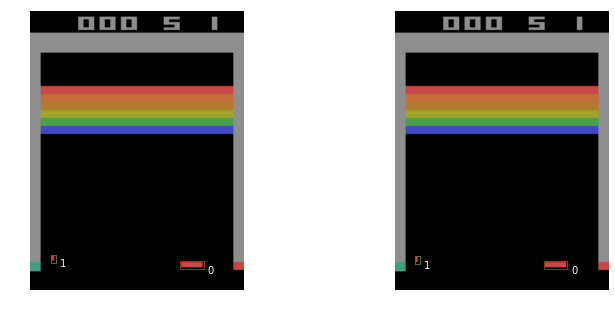


 Frame: 63


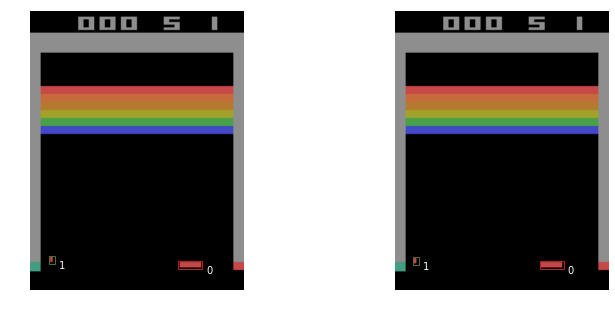


 Frame: 64


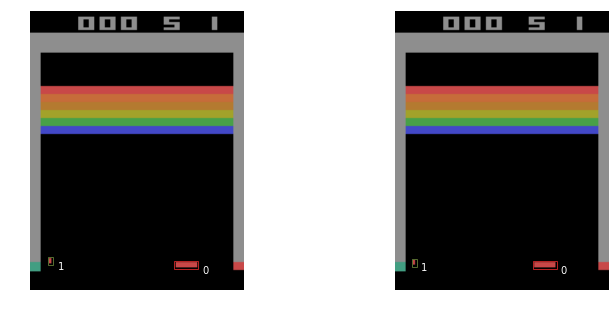


 Frame: 65


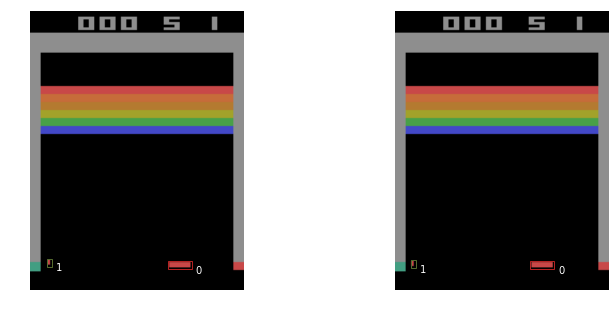


 Frame: 66


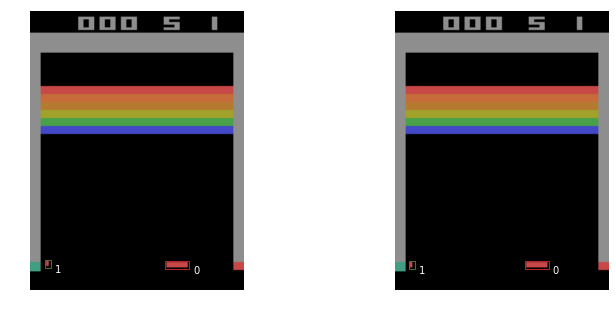


 Frame: 67


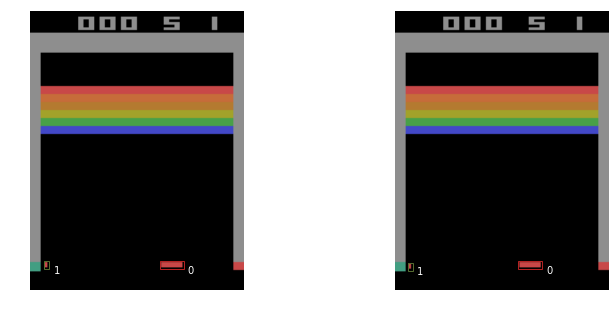


 Frame: 68


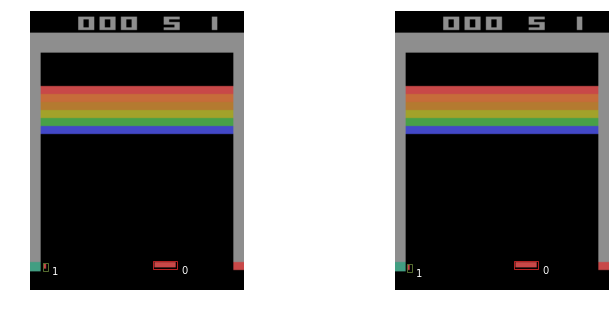


 Frame: 69


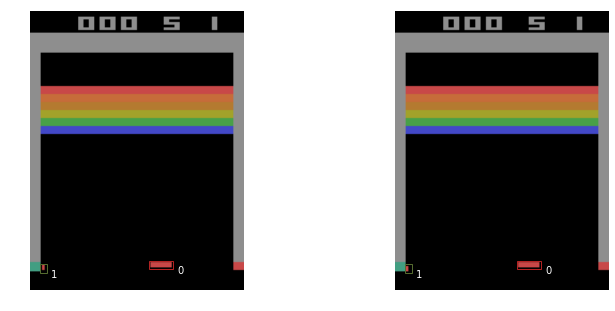


 Frame: 70


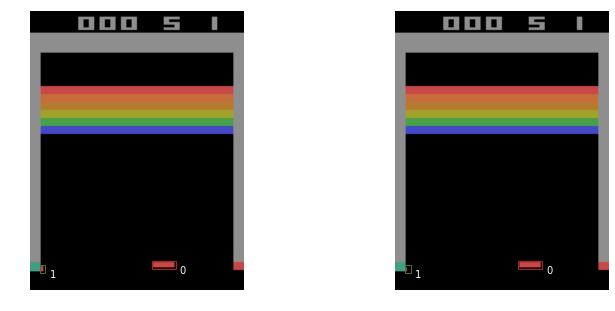


 Frame: 71


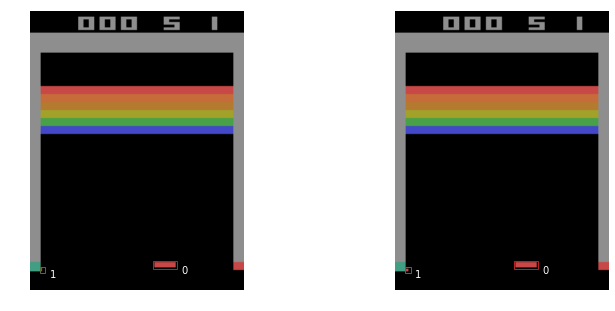


 Frame: 72


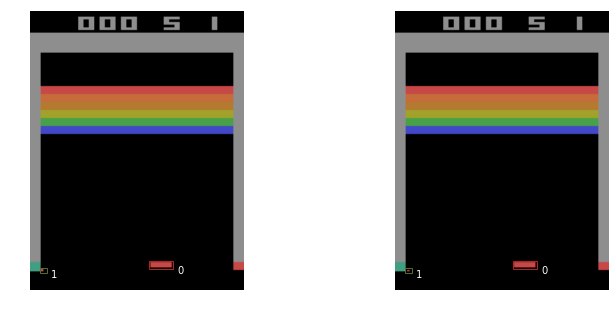


 Frame: 73


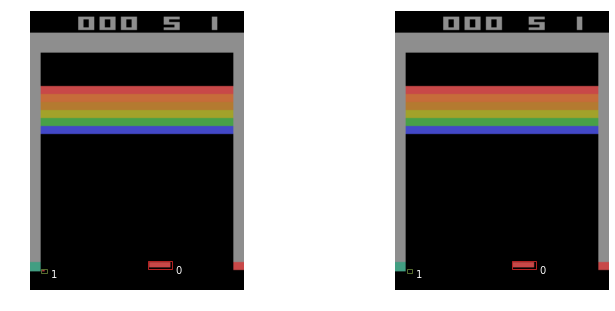


 Frame: 74


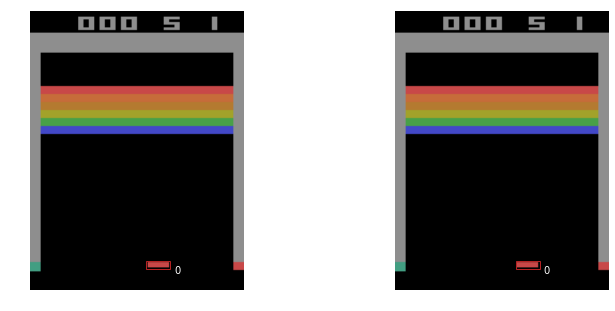


 Frame: 75


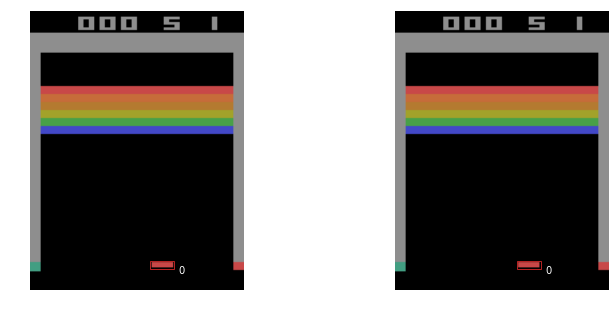


 Frame: 76


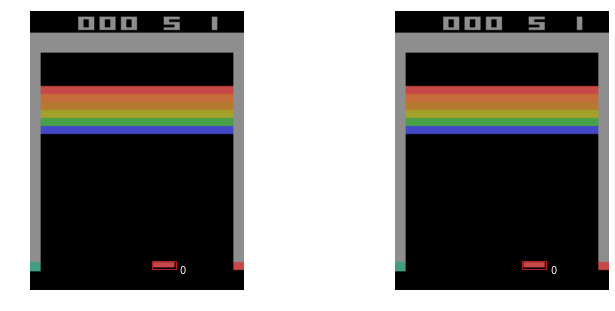


 Frame: 77


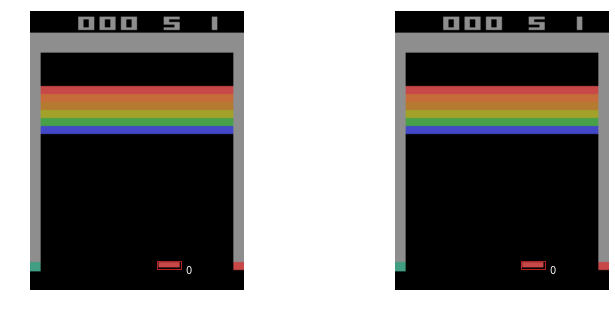


 Frame: 78


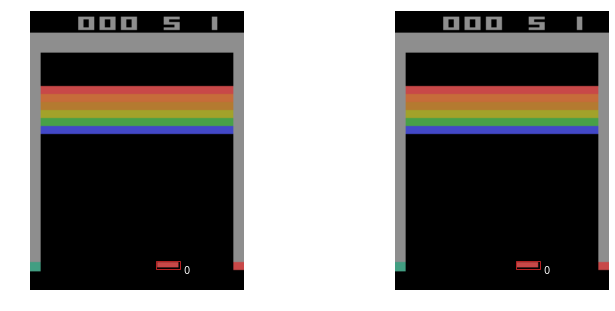


 Frame: 79


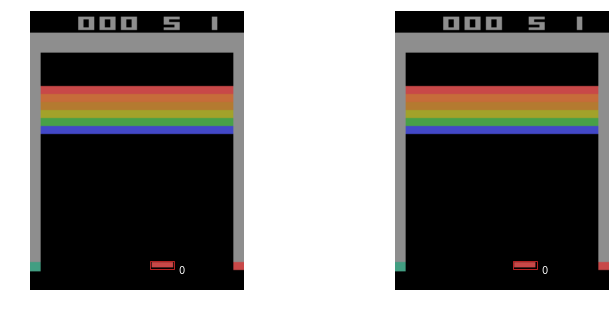


 Frame: 80


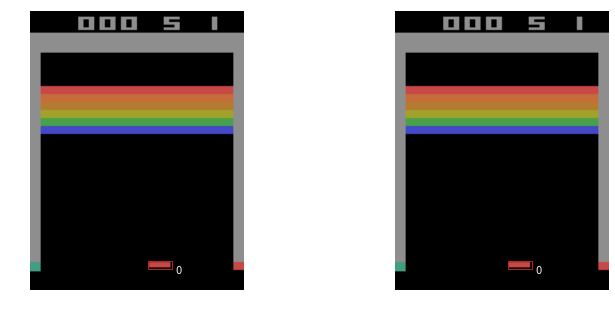


 Frame: 81


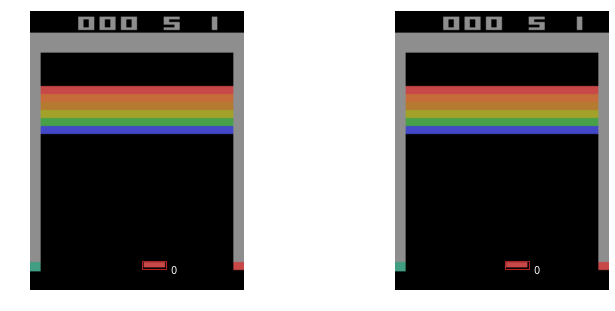


 Frame: 82


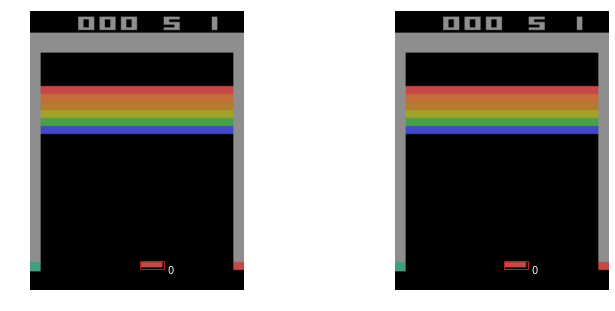


 Frame: 83


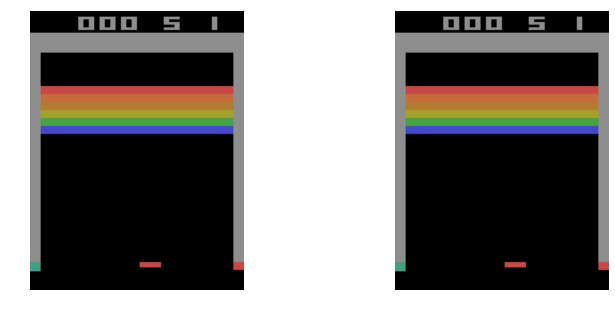


 Frame: 84


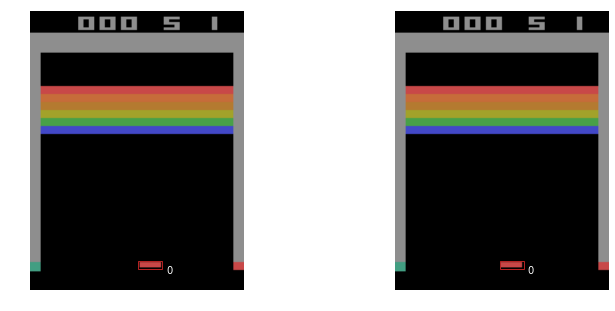


 Frame: 85


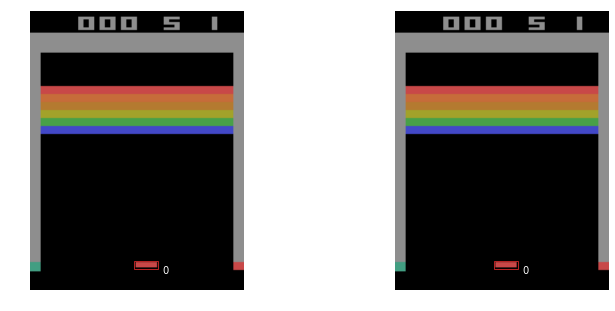


 Frame: 86


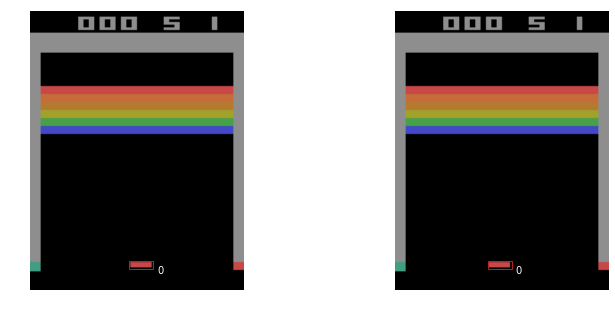


 Frame: 87


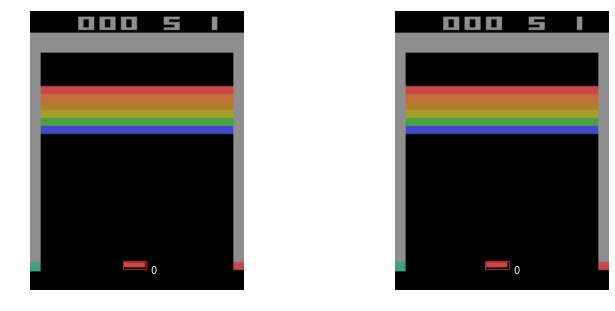


 Frame: 88


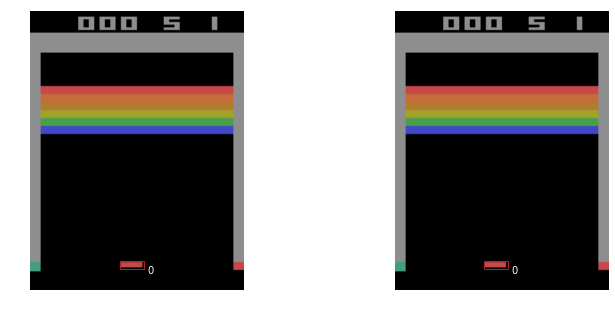


 Frame: 89


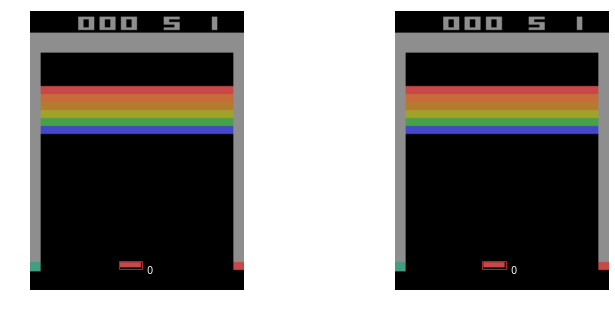


 Frame: 90


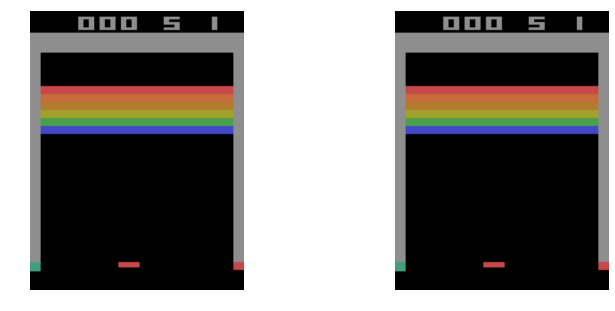


 Frame: 91


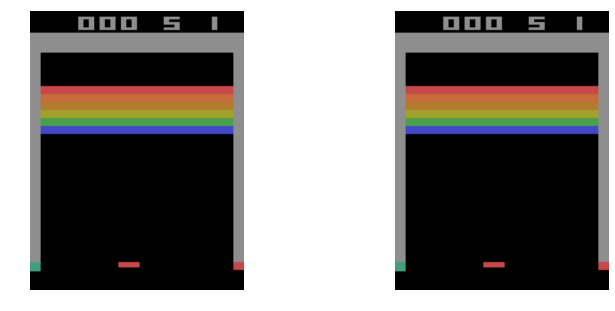


 Frame: 92


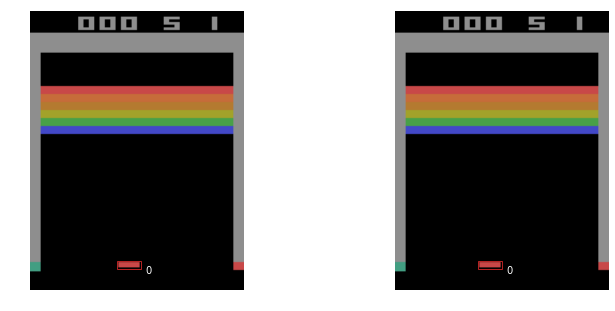


 Frame: 93


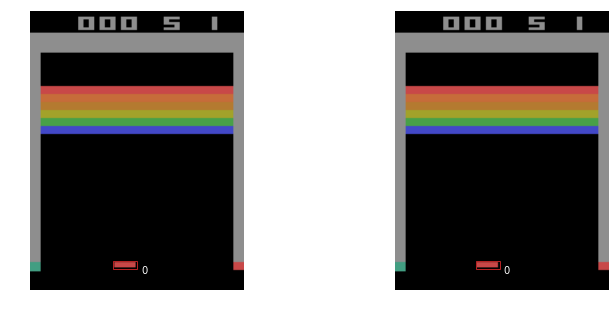


 Frame: 94


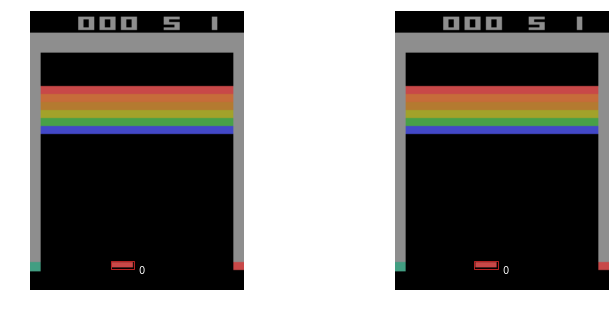


 Frame: 95


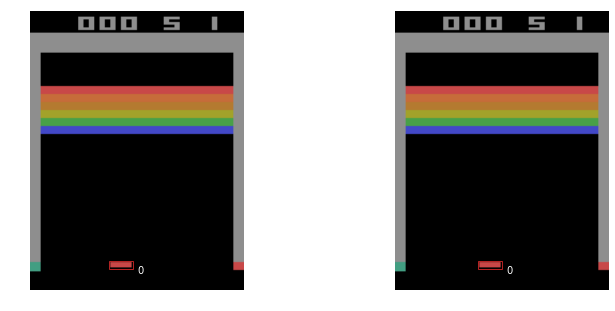


 Frame: 96


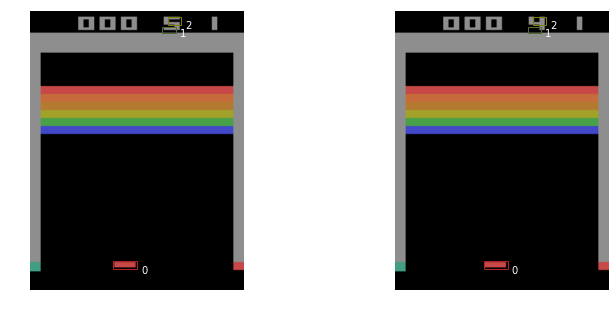


 Frame: 97


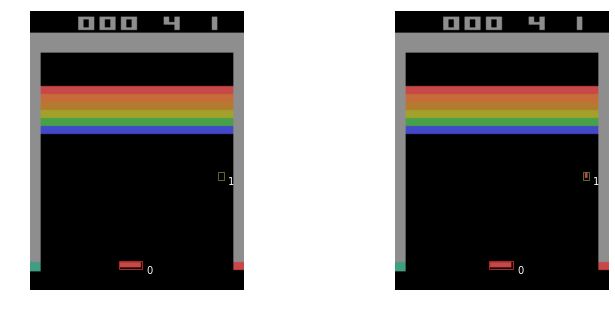


 Frame: 98


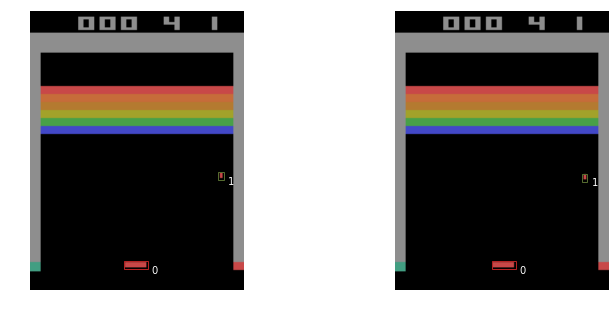


 Frame: 99


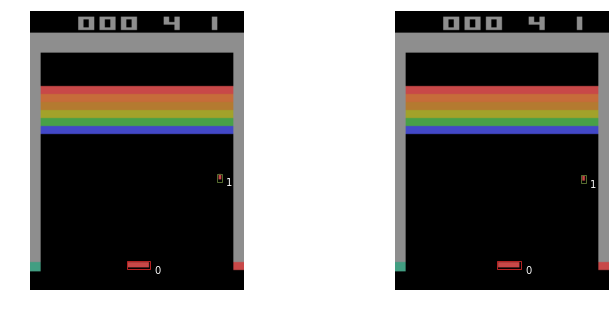


 Frame: 100


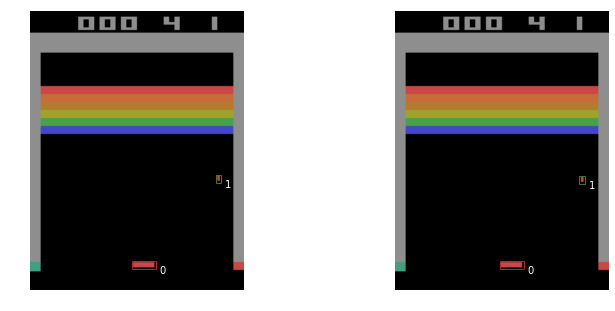


 Frame: 101


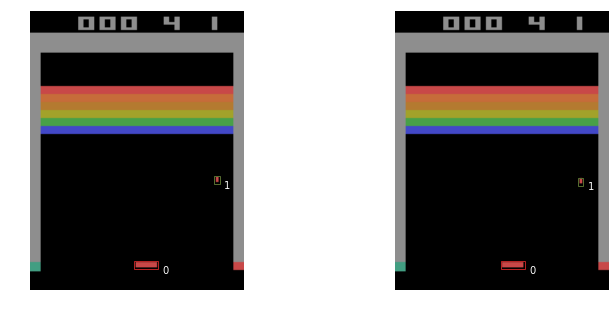


 Frame: 102


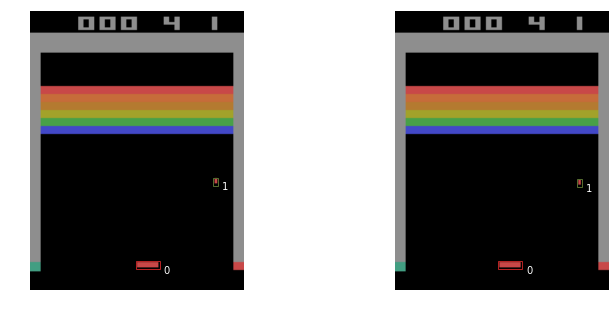


 Frame: 103


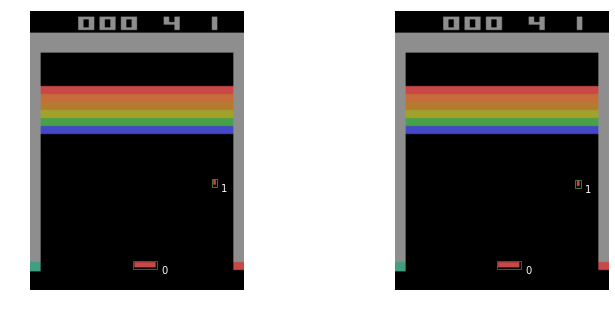


 Frame: 104


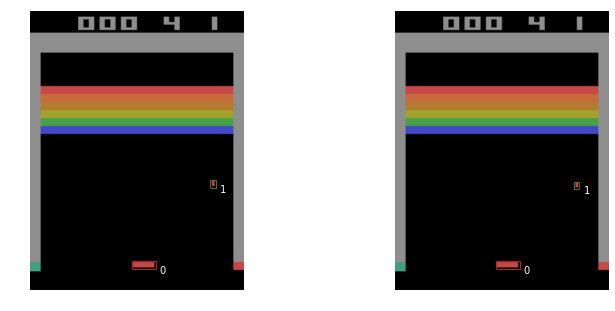


 Frame: 105


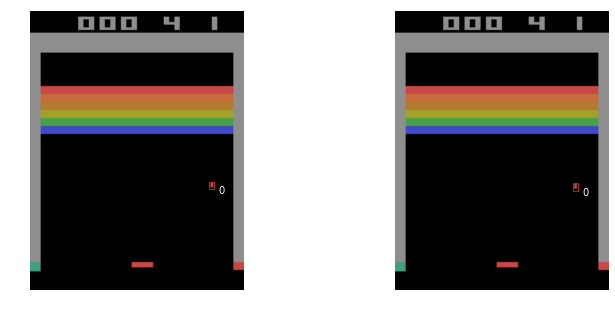


 Frame: 106


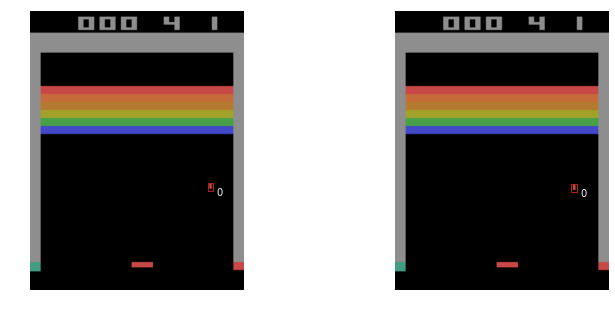


 Frame: 107


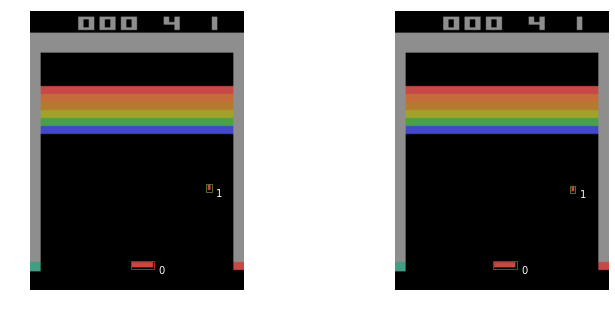


 Frame: 108


KeyboardInterrupt: 

In [218]:
for i in range(mt.cur_frame-1):
    print '\n Frame: ' + str(i)
    #print 'Action: ' + str(mt.action_hist[i]) + '\n'
    fig = plt.figure(figsize=(12,5))

    movers_cur_frame = []
    for m in mt.movers:
        cur_frame_pos = filter(lambda p: p[0]==i, m.trajectory)
        if len(cur_frame_pos) > 0:
            movers_cur_frame.append((m.id, cur_frame_pos[0][1]))
    ax = fig.add_subplot(121)
    plt.axis('off')
    plt.imshow(fp[i].s0)
    finder = fp[i].finder
    for m_id, boxes in enumerate(finder.mover_boxes):
        box = boxes[0]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[m_id+1],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    ax = fig.add_subplot(122)
    plt.axis('off')
    plt.imshow(fp[i].s1)
    for m_id, boxes in enumerate(finder.mover_boxes):
        box = boxes[1]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[m_id+1],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    plt.show()

In [ ]:
print mt.movers[1].trajectory
print mt.movers[2].trajectory

In [ ]:
print fp[2].mover_boxes[1][1]
print fp[3].mover_boxes[1][0]

print (fp[2].mover_boxes[1][1].ll).sq_dist(fp[3].mover_boxes[1][0].ll)
print (fp[2].mover_boxes[1][1].ur).sq_dist(fp[3].mover_boxes[1][0].ur)

In [ ]:
finder=fp[3].finder
#plt.imshow(finder.mover_boxes[1][1].img)
(5 + finder.cnts_joined[2].height) % finder.cnts_joined[2].height
finder.cnts_joined[2].height

In [ ]:
plt.imshow(fp[3].s0 - fp[2].s1)

In [ ]:
s0s = [f.s0 for f in fp]
s1s = [f.s1 for f in fp]

In [ ]:
ii = 2

f0 = cv2.cvtColor(fp[ii].s0, cv2.COLOR_BGR2GRAY).astype('float32')
f1 = cv2.cvtColor(fp[ii].s1, cv2.COLOR_BGR2GRAY).astype('float32')
s0 = fp[ii].s0
s1 = fp[ii].s1

boxes = fp[ii].boxes

plt.imshow(f1-f0)

In [ ]:
def join_cnts(cnts, inds):
    (x, y, w, h) = cv2.boundingRect(cnts[inds[0]])
    ll = Point(x,y)
    ur = Point(x+w,y+h)
    for ind in inds[1:]:
        (x, y, w, h) = cv2.boundingRect(cnts[ind]) 
        if x < ll.x:
            ll.x = x
        if x > ur.x:
            ur.x = x
        if y < ll.y:
            ll.y = y
        if y > ur.y:
            ur.y = y
    return Box(ll,ur)

In [ ]:
frame_diff = fp[ii].s1 - fp[ii].s0
fd_grey = cv2.cvtColor(frame_diff, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(fd_grey,1,255,cv2.THRESH_BINARY)[1]
thresh_dilated = cv2.dilate(thresh,None,iterations=1)
(cnts, _) = cv2.findContours(thresh_dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

from itertools import combinations
all_joins = [c \
 for l in range(1,len(cnts)+1) \
 for c in combinations(range(len(cnts)),l)\
]

cnts_joined = [join_cnts(cnts,inds) for inds in all_joins] 

'''
for i, c in enumerate(cnts_joined):
    (x, y, w, h) = (c.ll.x, c.ll.y, c.width, c.height)
    plt.imshow(thresh_dilated,cmap='gray')
    ax = plt.gca()
    plt.axis([0, 159, 209, 0])
    ax.add_patch(patches.Rectangle((x,y),w,h,color='g',fill=False))
    plt.show()
'''

In [ ]:
def generate_translate(f0, f1, shifts, debug=False):
    out = np.zeros(f0.shape)
    #out = f1.copy()
    n_changed = 0
    for i in range(shifts.shape[0]):
        for j in range(shifts.shape[1]):
            try:
                x_out_float = (i+shifts[i,j,0])# % out.shape[0]
                y_out_float = (j+shifts[i,j,1])# % out.shape[1]
                
                #frac_x = x_out_float - int(x_out_float)
                #frac_y = y_out_float - int(y_out_float)

                x_out = np.round(x_out_float).astype(int) % out.shape[0]
                y_out = np.round(y_out_float).astype(int) % out.shape[1]
                
                out[x_out,y_out,:] = f0[i,j,:]
                #out[x_out,y_out,:] = (1-frac_x)*(1-frac_y)*f0[i,j,:]
                #out[x_out+1,y_out,:] += (frac_x)*(1-frac_y)*f0[i,j,:]
                #out[x_out,y_out+1,:] += (1-frac_x)*(frac_y)*f0[i,j,:]
                #out[x_out+1,y_out+1,:] += (frac_x)*(frac_y)*f0[i,j,:]
                n_changed += 1
            except IndexError:
                pass
    if debug:
        return out, n_changed
    else:
        return out

In [ ]:
all_joins

In [ ]:
cnt_scores = {i: [] for i in range(len(cnts))}
cnt_score_params = {i: [] for i in range(len(cnts))}
for box_id, box in enumerate(cnts_joined):
    print box_id, '\n'
    box0 = Box(box.ll, box.ur)
    box1 = Box(box.ll, box.ur)
    # grayscale
    box0.add_image(f0)
    box1.add_image(f1)

    box0_1channel = np.expand_dims(box0.img,2)
    box1_1channel = np.expand_dims(box1.img,2)
    
    shifts = np.zeros((f0.shape[0],f0.shape[1],2))
    pc = cv2.phaseCorrelate(box0.img,box1.img)
    four_shifts = [[np.floor(pc[1]),np.floor(pc[0])],\
                   [np.ceil(pc[1]),np.floor(pc[0])],\
                   [np.floor(pc[1]),np.ceil(pc[0])],\
                   [np.ceil(pc[1]),np.ceil(pc[0])]
                  ]
    best_ratio = 1
    
    best_shift = four_shifts[0]
    for s in four_shifts:
        shifts[:,:,0] = s[0]
        shifts[:,:,1] = s[1]

        synth_box1 = generate_translate(box0_1channel,box1_1channel,shifts)
        synth_box0 = generate_translate(box1_1channel,box0_1channel,-shifts)

        ratio0 = score(box0_1channel,box1_1channel,shifts)/score(box0_1channel,box1_1channel,0*shifts)
        ratio1 = score(box1_1channel,box0_1channel,-shifts)/score(box1_1channel,box0_1channel,-0*shifts)

        ratio_s = max(ratio0,ratio1)
        if ratio_s < best_ratio:
            best_shift = s
            best_ratio = ratio_s
    
    s = best_shift
    for ind in all_joins[box_id]:
        cnt_scores[ind].append(best_ratio)
        cnt_score_params[ind].append([all_joins[box_id], s])
    
    shifts[:,:,0] = s[0]
    shifts[:,:,1] = s[1]

    synth_box1 = generate_translate(box0_1channel,box1_1channel,shifts)
    synth_box0 = generate_translate(box1_1channel,box0_1channel,-shifts)

    ratio0 = score(box0_1channel,box1_1channel,shifts)/score(box0_1channel,box1_1channel,0*shifts)
    ratio1 = score(box1_1channel,box0_1channel,-shifts)/score(box1_1channel,box0_1channel,-0*shifts)

    print ratio0
    print ''
    print ratio1
    print ''

    print s, '\n'

    plt.figure()
    plt.subplot(141)
    plt.axis('off')
    plt.imshow(box0.img,cmap='gray')
    plt.subplot(142)
    plt.axis('off')
    plt.imshow(box1.img,cmap='gray')
    plt.subplot(143)
    plt.axis('off')
    plt.imshow(synth_box0.squeeze(),cmap='gray')
    plt.subplot(144)
    plt.axis('off')
    plt.imshow(synth_box1.squeeze(),cmap='gray')

    plt.figure()
    plt.subplot(121)
    plt.axis('off')
    plt.imshow(box0.img - box1.img)
    plt.colorbar()
    plt.subplot(122)
    plt.axis('off')
    plt.imshow(box0.img - synth_box0.squeeze())
    plt.colorbar()

    plt.show()

In [ ]:
print cnt_scores
print cnt_score_params

print cnt_scores_remaining

In [ ]:
pdb.set_trace()
cnt_best_params = {}
cnt_scores_remaining = cnt_scores.copy()
cnt_score_params_remaining = cnt_score_params.copy()

while len(cnt_best_params) < len(cnts):
    best_scores_cnts = {k: min(v) \
                        for k, v in cnt_scores_remaining.iteritems()}
    winning_index = np.argmin(best_scores_cnts.values())
    winner = best_scores_cnts.keys()[winning_index]
    winner_best_index = np.argmin(cnt_scores_remaining[winner])
    cnt_best_params[winner] = cnt_score_params[winner][winner_best_index]
    print cnt_scores_remaining, '\n'
    print cnt_score_params_remaining, '\n\n'
    forbidden_inds = set(cnt_best_params[winner][0])
    for k in cnt_scores_remaining:
        scores_k = cnt_scores_remaining[k]
        for j, sc in enumerate(scores_k):
            join_k_j = cnt_score_params_remaining[k][j][0]
            if len(forbidden_inds & set(join_k_j)) > 0:
                del cnt_scores_remaining[k][j]
                del cnt_score_params_remaining[k][j]
    cnt_scores_remaining.pop(winner)
cnt_best_params 

In [ ]:
cnt_best_params = {}
for cnt_id in cnt_scores:
    best_index = np.argmin(cnt_scores[cnt_id])
    cnt_best_params[cnt_id] = cnt_score_params[cnt_id][best_index]
cnt_best_params

In [ ]:
mover_joins = set()
mover_shifts = {}
for c in cnt_best_params.values():
    mover_joins.add(c[0])
    mover_shifts[c[0]] = Point(int(c[1][1]),int(c[1][0]))
mover_boxes = {inds: join_cnts(cnts,inds) for inds in mover_joins}

In [ ]:
for ind in mover_boxes:
    box = mover_boxes[ind]
    shift = mover_shifts[ind]
    # delete line below later
    shift = Point(shift.x, shift.y)
    print shift
    n_shift = -shift
    box0 = Box(box.ll-shift.thresh(-1), box.ur-shift.thresh(1))
    box1 = Box(box.ll-n_shift.thresh(-1), box.ur-n_shift.thresh(1))
    print box0.center
    print box1.center
    print box1.center - box0.center
    box0.add_image(s0)
    box1.add_image(s1)
    plt.subplot(121)
    plt.imshow(box0.img)
    plt.subplot(122)
    plt.imshow(box1.img)
    plt.show()

In [ ]:
def score(f0, f1, shifts):
    err = f1 - generate_translate(f0, f1, shifts)
    return np.sqrt(sum(err.flatten()**2))

def start(f0, f1):
    diff = f1 - f0
    nz = diff.nonzero()
    rand_nz = np.random.randint(nz[0].shape[0])
    point = (nz[0][rand_nz], nz[1][rand_nz])

    scores = []
    inds = []
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    for i in range(-3,4):
        for j in range(-3,4):
            s[point[0], point[1], 0] = i
            s[point[0], point[1], 0] = j
            inds.append((i,j))
            scores.append(score(f0, f1, s))
    shift = inds[np.argmin(scores)]
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    s[point[0], point[1], 0] = shift[0]
    s[point[0], point[1], 1] = shift[1]
    print score(f0, f1, s)
    return shift

def expand(f0, f1, shift):
    diff = f1 - f0
    nz = diff.nonzero()
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    for ind in range(nz[0].shape[0]-1):
        i = nz[0][ind]
        j = nz[1][ind]
        s[i,j,0] = shift[0]
        s[i,j,1] = shift[1]
    s[:,:,0] = shift[0]
    s[:,:,1] = shift[1]
    print score(f0, f1, s)
    return s

In [ ]:

mhi = np.zeros(frame_thresh[0].shape,dtype=np.float32)

f_gray = cv2.cvtColor(fp[0].s0, cv2.COLOR_BGR2GRAY)
cv2.updateMotionHistory(f_gray,mhi,1,10)

for i, f in enumerate(fp):
    f_gray = cv2.cvtColor(f.s1, cv2.COLOR_BGR2GRAY)
    cv2.updateMotionHistory(f_gray,mhi,i+2,10)

In [ ]:
for i in range(1,10):
    mhi2 = mhi.copy()
    mhi2[mhi2 != i] = 0
    plt.imshow(mhi2,cmap='gray')
    plt.show()

In [ ]:
mg_mask, mg_orient = cv2.calcMotionGradient(mhi,1,3)

for i in range(len(frame_thresh)+1):
    seg_mask, seg_bounds = \
    cv2.segmentMotion(mhi, i+1, 2)
    
    plt.figure(figsize=(12,5))
    ax = plt.subplot(131)
    plt.imshow(seg_mask,cmap='gray')
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    ax = plt.subplot(132)
    plt.imshow(s0s[i])
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    ax = plt.subplot(133)
    plt.imshow(s1s[i])
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    plt.show()

In [ ]:
i=3
s0=s0s[i]
s1=s0s[i+1]

s0_gray = cv2.cvtColor(s0, cv2.COLOR_BGR2GRAY)
s1_gray = cv2.cvtColor(s1, cv2.COLOR_BGR2GRAY)

plt.imshow(s1-s0)

In [ ]:
shift

In [ ]:
shift = start(s0,s1)
print score(s0, s1, np.zeros((s0.shape[0],s0.shape[1],2),dtype=int))
s = expand(s0, s1, shift)
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.imshow(generate_translate(s0, s1, s))
plt.subplot(132)
plt.imshow(s0)
plt.subplot(133)
plt.imshow(s1)

In [ ]:
s = 0*np.ones((s0.shape[0],s0.shape[1],2),dtype=int)
s[:,:,0]=0

In [ ]:
plt.imshow(generate_translate(s0, s1, s))

In [ ]:
plt.imshow(s0)
plt.show()
plt.imshow(s1)
plt.show()